# Importing a Qrisp circuit and running simulations with it

In [1]:
import sys
import random
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
from pathlib import Path

ASSETS_FOLDER = Path("../../assets/").resolve()
sys.path.insert(0, str(ASSETS_FOLDER))

# To display interactive 3D visualisations, uncomment the following line.
# %matplotlib widget

This notebook illustrates the process of importing into TQEC circuits originally created with Qrisp.

The notebook assumes you have already designed a Qrisp circuit. 

> **NB!** Run `uv add --only-group integration` to install the libraries used in this notebook (ignore if you installed all dependency groups when setting up TQEC).

## Load Qrisp circuit

The first step is, naturally, to load the Qrisp circuit.

In [2]:
from qrisp.jasp import make_jaspr
import steane_qrisp # type: ignore[reportMissingImports]

# CIRCUIT NAME
circuit_name = "steane"

# LOAD CIRCUIT
# Since Qrisp doesn't have a native file format,
# we import a function which returns a Qrisp circuit.


qc_encoding_function = getattr(steane_qrisp, f"{circuit_name}_qrisp")
qc = qc_encoding_function()[0].qs

# CONVERT to QASM
jaspr = make_jaspr(qc_encoding_function)()
qasm_str = jaspr.to_qasm()

/home/runner/work/tqec/tqec/.venv/lib/python3.13/site-packages/qrisp/jasp/primitives/kernel_primitives.py:2: SyntaxWarning: invalid escape sequence '\*'
  \********************************************************************************
/home/runner/work/tqec/tqec/.venv/lib/python3.13/site-packages/qrisp/jasp/evaluation_tools/boolean_simulation.py:122: SyntaxWarning: invalid escape sequence '\k'
  $\ket{0}$ state. For the second case, the first qubit is in the $\ket{1}$


/home/runner/work/tqec/tqec/.venv/lib/python3.13/site-packages/qrisp/alg_primitives/iterative_qae.py:201: SyntaxWarning: invalid escape sequence '\m'
  The amount of amplification steps, i.e., the power of :math:`\mathcal{Q}` in amplitude amplification.
/home/runner/work/tqec/tqec/.venv/lib/python3.13/site-packages/qrisp/alg_primitives/iterative_qae.py:248: SyntaxWarning: invalid escape sequence '\e'
  :math:`\epsilon` limit.
/home/runner/work/tqec/tqec/.venv/lib/python3.13/site-packages/qrisp/alg_primitives/arithmetic/SBP_arithmetic.py:1147: SyntaxWarning: invalid escape sequence '\k'
  \ket{y_1}\dotsb\ket{y_n}\\rightarrow e^{itP(y_1,\dotsc,y_n)}\ket{y_1}\dotsb\ket{y_n}
/home/runner/work/tqec/tqec/.venv/lib/python3.13/site-packages/qrisp/alg_primitives/arithmetic/SBP_arithmetic.py:1274: SyntaxWarning: invalid escape sequence '\k'
  \ket{y_1}\dotsb\ket{y_n}\\rightarrow e^{itP(y_1,\dotsc,y_n)}\ket{y_1}\dotsb\ket{y_n}
/home/runner/work/tqec/tqec/.venv/lib/python3.13/site-packages/qrisp/a

/home/runner/work/tqec/tqec/.venv/lib/python3.13/site-packages/qrisp/algorithms/qaoa/qaoa_problem.py:158: SyntaxWarning: invalid escape sequence '\p'
  The parameters are initialized uniformly at random in the interval $[0,\pi/2]$.
/home/runner/work/tqec/tqec/.venv/lib/python3.13/site-packages/qrisp/algorithms/qaoa/qaoa_problem.py:600: SyntaxWarning: invalid escape sequence '\p'
  The parameters are initialized uniformly at random in the interval $[0,\pi/2]$.
/home/runner/work/tqec/tqec/.venv/lib/python3.13/site-packages/qrisp/algorithms/qaoa/qaoa_problem.py:852: SyntaxWarning: invalid escape sequence '\p'
  The parameters are initialized uniformly at random in the interval $[0,\pi/2]$.
/home/runner/work/tqec/tqec/.venv/lib/python3.13/site-packages/qrisp/algorithms/qaoa/problems/QUBO.py:80: SyntaxWarning: invalid escape sequence '\g'
  A function receiving a :ref:`QuantumVariable` and a real parameter $\gamma$.
/home/runner/work/tqec/tqec/.venv/lib/python3.13/site-packages/qrisp/algori

/home/runner/work/tqec/tqec/.venv/lib/python3.13/site-packages/qrisp/algorithms/vqe/vqe_problem.py:443: SyntaxWarning: invalid escape sequence '\p'
  The default is ``random``: Parameters are initialized uniformly at random in the interval $[0,\pi/2)]$.
/home/runner/work/tqec/tqec/.venv/lib/python3.13/site-packages/qrisp/algorithms/vqe/vqe_problem.py:532: SyntaxWarning: invalid escape sequence '\p'
  The default is ``random``: Parameters are initialized uniformly at random in the interval $[0,\pi/2)]$.
/home/runner/work/tqec/tqec/.venv/lib/python3.13/site-packages/qrisp/algorithms/vqe/vqe_problem.py:638: SyntaxWarning: invalid escape sequence '\p'
  The default is ``random``: Parameters are initialized uniformly at random in the interval $[0,\pi/2)]$.
/home/runner/work/tqec/tqec/.venv/lib/python3.13/site-packages/qrisp/operators/qubit/qubit_operator.py:837: SyntaxWarning: invalid escape sequence '\d'
  $H = (O + O^\dagger)/2$
/home/runner/work/tqec/tqec/.venv/lib/python3.13/site-packag

We can print the original circuit for inspection.

In [3]:
print(f"\n=> Imported Qrisp circuit of name {circuit_name.capitalize()}:\n")
print(qc) if qc else print("ERROR. Failed to load a circuit")


=> Imported Qrisp circuit of name Steane:

QuantumCircuit:
---------------
         ┌───┐                                   ┌───┐                         
qbl_0.0: ┤ H ├──■────■─────────■──────────────■──┤ H ├─────────────────────────
         ├───┤  │    │         │              │  └───┘          ┌───┐          
qbl_1.0: ┤ H ├──┼────┼────■────┼────■─────────┼────■─────────■──┤ H ├──────────
         ├───┤  │    │    │    │    │         │    │         │  └───┘     ┌───┐
qbl_2.0: ┤ H ├──┼────┼────┼────┼────┼────■────┼────┼────■────┼────■────■──┤ H ├
         └───┘┌─┴─┐  │  ┌─┴─┐  │    │  ┌─┴─┐  │    │    │    │    │    │  └───┘
qbl_3.0: ─────┤ X ├──┼──┤ X ├──┼────┼──┤ X ├──┼────┼────┼────┼────┼────┼───────
              └───┘┌─┴─┐└───┘  │  ┌─┴─┐└───┘  │    │    │    │    │    │       
qbl_4.0: ──────────┤ X ├───────┼──┤ X ├───────┼────┼────┼────┼────┼────┼───────
                   └───┘     ┌─┴─┐└───┘       │    │  ┌─┴─┐  │    │    │       
qbl_5.0: ────────────────────┤ X ├──────────

And we should also inspect the QASM string resulting from the circuit.

In [4]:
print(f"\n=> Converted Qrisp circuit of name {circuit_name.capitalize()} into the following QASM string:\n")
print(qasm_str) if qasm_str else print("ERROR. Failed to convert circuit to QASM")


=> Converted Qrisp circuit of name Steane into the following QASM string:

OPENQASM 2.0;
include "qelib1.inc";
qreg qb_69[1];
qreg qb_70[1];
qreg qb_71[1];
qreg qb_72[1];
qreg qb_73[1];
qreg qb_74[1];
qreg qb_75[1];
qreg qb_76[1];
qreg qb_77[1];
qreg qb_78[1];
h qb_69[0];
cx qb_69[0],qb_72[0];
cx qb_69[0],qb_73[0];
cx qb_69[0],qb_74[0];
cx qb_69[0],qb_75[0];
h qb_69[0];
h qb_70[0];
cx qb_70[0],qb_72[0];
cx qb_70[0],qb_73[0];
cx qb_70[0],qb_76[0];
cx qb_70[0],qb_77[0];
h qb_70[0];
h qb_71[0];
cx qb_71[0],qb_72[0];
cx qb_71[0],qb_74[0];
cx qb_71[0],qb_76[0];
cx qb_71[0],qb_78[0];
h qb_71[0];


## QASM to PyZX

To be able to perform algorithmic lattice surgery on a QASM string, we need to import it into PyZX and convert it into a PyZX graph. 

So, let's start by turning `qasm_str` into a PyZX circuit.

In [5]:
if qasm_str:
    import pyzx as zx
    zx.settings.colors = zx.rgb_colors

    # Import QASM into PyZX
    zx_circuit = zx.Circuit.from_qasm(qasm_str)

    # Convert incoming circuit into graph
    zx_graph = zx_circuit.to_graph()

    # Draw graph of incoming circuit
    zx.draw(zx_graph, labels = True)

The incoming circuit is not optimised. It is possible to turn an unoptimised circuit into a TQEC `block_graph` but the space-time volume of the result would be very high. It is therefore a good idea to optimise the incoming circuit. 

For this, since PyZX's QASM compatibility is still in-development, we need to start by initialising the qubits after converting the circuit into a graph and adding measurement bases for the ancilla qubits.

In [6]:
if zx_graph:
    # Apply states
    num_apply_state = zx_graph.num_inputs()
    zx_graph.apply_state('0' * num_apply_state)

    # Apply post-select only to the outputs of the ancilla qubits
    zx_graph.apply_effect('000///////')
    zx.draw(zx_graph, labels = True)

It is now possible to use more-standard PyZX methods to optimise the circuit/graph further.

In [7]:
if zx_graph:
    # From Aleks Kissinger's notebook: https://nbviewer.org/github/zxcalc/pyzx/blob/master/demos/example-circuit-simp.ipynb
    zx.full_reduce(zx_graph)
    zx.to_rg(zx_graph)

    random.seed(12)
    zx.draw(zx_graph, labels = True, auto_layout=True)

## Algorithmic lattice surgery

It is now time to convert the PyZX graph into a space-time diagram. For this, we can use topologiq.

The first is to convert the graph into topologiq's native graph object, a `simple_graph`.

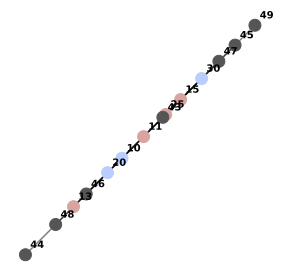

nodes: [(10, 'Z'), (11, 'X'), (13, 'X'), (15, 'X'), (20, 'Z'), (25, 'X'), (30, 'Z'), (43, 'O'), (44, 'O'), (45, 'O'), (46, 'O'), (47, 'O'), (48, 'O'), (49, 'O')]
edges: [((10, 11), 'SIMPLE'), ((10, 13), 'SIMPLE'), ((10, 15), 'SIMPLE'), ((10, 46), 'SIMPLE'), ((11, 20), 'SIMPLE'), ((11, 43), 'SIMPLE'), ((11, 30), 'SIMPLE'), ((13, 44), 'SIMPLE'), ((13, 20), 'SIMPLE'), ((15, 45), 'SIMPLE'), ((15, 30), 'SIMPLE'), ((20, 25), 'SIMPLE'), ((20, 48), 'SIMPLE'), ((25, 47), 'SIMPLE'), ((25, 30), 'SIMPLE'), ((30, 49), 'SIMPLE')]


In [8]:
if zx_graph:

    from topologiq.utils.interop_pyzx import pyzx_g_to_simple_g
    from topologiq.utils.simple_grapher import simple_graph_vis

    # Transform ZX-graph into topologiq's native `simple_graph`
    simple_graph = pyzx_g_to_simple_g(zx_graph)

    # Print `simple_graph for inspection`
    # We extract `fig_data` from the `simple_graph` due to having been unable to use PyZX visualisations for this.
    # This does mean the overlay in future visualisations will not look exactly as the PyZX graph above.

    fig_data = simple_graph_vis(simple_graph)
    for k, v in simple_graph.items():
        print(f"{k}: {v}")

After, we can run the `simple_graph` by topologiq.

.


SUCCESS!!! Duration: 0.64s. (attempt), 0.64s (total).
Visualisations enabled. For faster runtimes, disable visualisations.


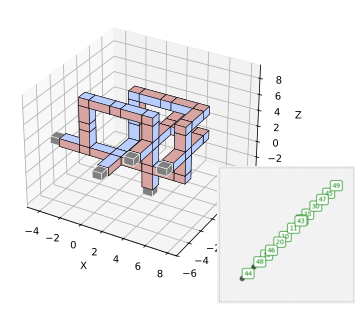

In [9]:
if zx_graph:

    from topologiq.scripts.runner import runner

    # Parameters & hyper-parameters
    full_circuit_name = f"qrisp_{circuit_name}"
    vis = "final"  # Calls 3D visualisation at the end. `None` to deactivate.
    anim = None

    VALUE_FUNCTION_HYPERPARAMS = (
        -1,  # Weight for length of path
        -1,  # Weight for number of "beams" broken by path
    )

    kwargs = {
        "weights": VALUE_FUNCTION_HYPERPARAMS,
        "length_of_beams": 9,
    }

    # Run topologiq
    _, _, lattice_nodes, lattice_edges = runner(
        simple_graph,  # The simple_graph to be processed by Topologiq
        full_circuit_name,  # Name of the circuit
        min_succ_rate = 60,  # Runtime saving parameter (min % of total possible paths per edge)
        strip_ports = False,  # Remove open boundaries from an incoming graph
        hide_ports = False,  # Leave open boundaries in graph object but hide in visualisations
        max_attempts = 10,  # Maximum # of attempts to find a successful solution
        stop_on_first_success = True,  # Exit when any attempt is successful (False useful for automating stats)
        visualise = (vis, anim),  # (Visualisation mode, Animation mode)
        log_stats = False,  # Automatically log stats for all runs (requires writing privileges)
        debug = False,  # Enter debug mode (additional detail in visualisation)
        fig_data = fig_data,  # Matplotlib object containing input ZX graph (to overlay over visualisations)
        **kwargs,  # {Weights for value function, Length of beams}
    )

And we can print topologiq's outputs to inspect them, in particular, `lattice_nodes` and `lattice_edges`, which will become the TQEC `block_graph`.

In [10]:
if lattice_nodes and lattice_edges:
    print("\nCubes in final output:")
    for k, v in lattice_nodes.items():
        print(f"{k}:{v}")

    print("\nPipes in final output:")
    for k, v in lattice_edges.items():
        print(f"{k}:{v}")


Cubes in final output:
30:((0, 0, 0), 'xxz')
11:((3, 0, 0), 'zxz')
15:((-3, 0, 0), 'zxz')
25:((0, 3, 0), 'xzz')
49:((0, -3, 0), 'ooo')
10:((3, 0, 3), 'zxx')
56:((6, 0, 0), 'zxz')
20:((6, 0, 3), 'zxx')
43:((3, 0, -3), 'ooo')
45:((-6, 0, 0), 'ooo')
47:((0, 6, 0), 'ooo')
13:((3, 3, 3), 'zzx')
46:((3, -3, 3), 'ooo')
48:((6, -3, 3), 'ooo')
44:((3, 6, 3), 'ooo')
66:((3, 0, 6), 'zxz')
68:((0, 0, 6), 'xxz')
70:((-3, 0, 6), 'zxz')
72:((-3, 0, 3), 'zxx')
75:((6, 3, 3), 'zzx')
78:((6, 0, 6), 'zxx')
80:((6, 3, 6), 'zzx')
82:((3, 3, 6), 'zzx')
84:((0, 3, 6), 'xzx')
86:((0, 3, 3), 'xzz')

Pipes in final output:
(30, 11):['oxz', (30, 11)]
(30, 15):['oxz', (30, 15)]
(30, 25):['xoz', (30, 25)]
(30, 49):['xoz', (30, 49)]
(11, 10):['zxo', (11, 10)]
(11, 56):['oxz', (11, 20)]
(56, 20):['zxo', (11, 20)]
(11, 43):['zxo', (11, 43)]
(15, 45):['oxz', (15, 45)]
(25, 47):['xoz', (25, 47)]
(10, 13):['zox', (10, 13)]
(10, 46):['zox', (10, 46)]
(20, 48):['zox', (20, 48)]
(13, 44):['zox', (13, 44)]
(10, 66):['zxo',

## Importing to TQEC

The structure of `lattice_nodes` and `lattice_edges` is essentially the same as TQEC's `block_graph`, with one caveat.

There is a need to perform some re-scaling and re-indexing of edges. In TQEC's `block_graph`, pipes occupy no space, which leads to adjacent cubes being closer to one another than in a space-time diagram where pipes do occupy space for the purposes of visualising things clearly.

Fortunately, TQEC already has a way to import 3D objects like `lattice_nodes` and `lattice_edges`. TQEC can import 3D models encoded in COLLADA format (.dae), which use the same kind of coordinates and artifacts as `lattice_nodes` and `lattice_edges`. Accordingly, the following block of code relies on TQEC's COLLADA interoperability to realise similar transformations for `lattice_nodes` and `lattice_edges`, leading into a `block_graph`.

In [11]:
if lattice_nodes and lattice_edges:

    from tqec.interop.pyzx.topologiq import read_from_lattice_dicts
    from tqec.computation.block_graph import BlockGraph

    # Import using standardised method for importing lattice surgeries / space-time diagram into TQEC
    lattice_edges_min = dict([(k,v[0]) for k,v in lattice_edges.items()])
    block_graph: BlockGraph = read_from_lattice_dicts(lattice_nodes, lattice_edges_min, graph_name=full_circuit_name)

    # Visualise using TQEC methods
    html = block_graph.view_as_html()
    display(html)

You may have noticed the imported blockgraph lacks the boundary nodes / port cubes, the ones seen in gray in topologiq's 3D visualisation. 

This is normal. The TQEC import adds transparent placeholder objects at those coordinates.

To enable computation, these need to be "filled", which is done as follows.

In [12]:
if block_graph:

    # Fill ports using function that yields minimal set of block_graphs needed for simulation
    filled_block_graphs = block_graph.fill_ports_for_minimal_simulation()

    # Show all block_graphs in minimal set
    for i, filled_block_graph in enumerate(filled_block_graphs):
        for j, correlation_surface in enumerate(filled_block_graph.observables):
            filled_block_graph.graph.view_as_html(
                pop_faces_at_directions=("-Y", "+X"),
                show_correlation_surface=filled_block_graph.observables[j],
            )

And we can now use the blockgraph to perform TQEC operations. 

Let's start by getting the Stim circuit for different bases. 

In [13]:
if block_graph and filled_block_graphs:

    from tqec import compile_block_graph, NoiseModel
    from tqec.utils.enums import Basis

    # Function to get the correct filled_graphs for each basis
    def graphs_for_given_basis(pre_filled_block_graphs, observable_basis: Basis) -> BlockGraph | None:
        filled_graphs = pre_filled_block_graphs
        assert len(filled_graphs) == 2
        if observable_basis == Basis.X:
            return filled_graphs[0].graph
        elif observable_basis == Basis.Z:
            return filled_graphs[1].graph

    # Function to get Stim circuit for given basis
    def get_stim_circuit(pre_filled_block_graphs):

        block_graph_for_computation = graphs_for_given_basis(pre_filled_block_graphs, Basis.X)
        if block_graph_for_computation:
            compiled_graph = compile_block_graph(block_graph_for_computation)
            stim_circuit = compiled_graph.generate_stim_circuit(
                k=1, noise_model=NoiseModel.uniform_depolarizing(p=0.001)
            )
            print("\nFirst 10 lines of Stim circuit (Basis X):\n")
            print(stim_circuit[:10])

        block_graph_for_computation = graphs_for_given_basis(pre_filled_block_graphs, Basis.Z)
        if block_graph_for_computation:
            compiled_graph = compile_block_graph(block_graph_for_computation)
            stim_circuit = compiled_graph.generate_stim_circuit(
                k=1, noise_model=NoiseModel.uniform_depolarizing(p=0.001)
            )
            print("\nFirst 10 lines of Stim circuit (Basis Z):\n")
            print(stim_circuit[:10])

    # Call Stim circuit generation for all relevant bases
    if filled_block_graphs:
        get_stim_circuit(filled_block_graphs)


First 10 lines of Stim circuit (Basis X):

QUBIT_COORDS(-16, 0) 0
QUBIT_COORDS(-16, 2) 1
QUBIT_COORDS(-16, 4) 2
QUBIT_COORDS(-16, 6) 3
QUBIT_COORDS(-15, 1) 4
QUBIT_COORDS(-15, 3) 5
QUBIT_COORDS(-14, 0) 6
QUBIT_COORDS(-14, 2) 7
QUBIT_COORDS(-14, 4) 8
QUBIT_COORDS(-14, 6) 9



First 10 lines of Stim circuit (Basis Z):

QUBIT_COORDS(-16, 0) 0
QUBIT_COORDS(-16, 2) 1
QUBIT_COORDS(-16, 4) 2
QUBIT_COORDS(-16, 6) 3
QUBIT_COORDS(-15, 1) 4
QUBIT_COORDS(-15, 3) 5
QUBIT_COORDS(-15, 5) 6
QUBIT_COORDS(-14, 0) 7
QUBIT_COORDS(-14, 2) 8
QUBIT_COORDS(-14, 4) 9


And let's now run a simulation. 

Correlation surface for qrisp_steane_Z_0


Correlation surface for qrisp_steane_Z_1


Correlation surface for qrisp_steane_Z_2


Correlation surface for qrisp_steane_Z_3


Correlation surface for qrisp_steane_X_0


Correlation surface for qrisp_steane_X_1


Correlation surface for qrisp_steane_X_2


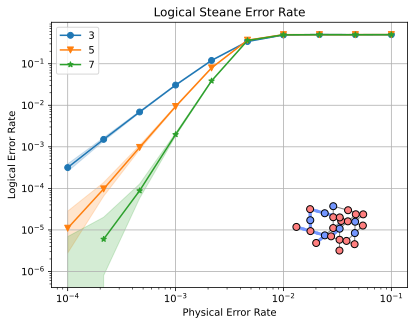

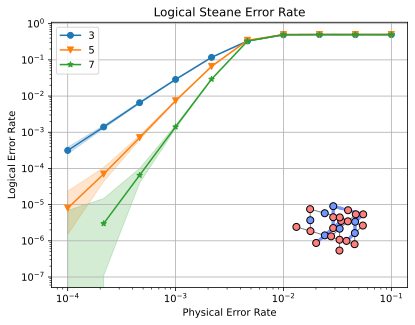

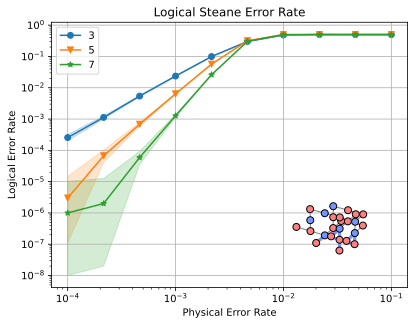

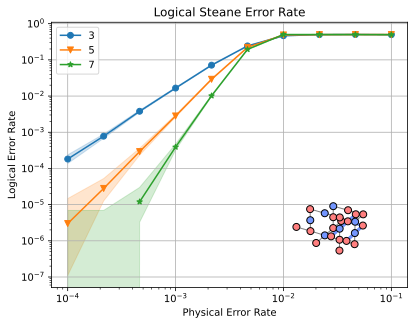

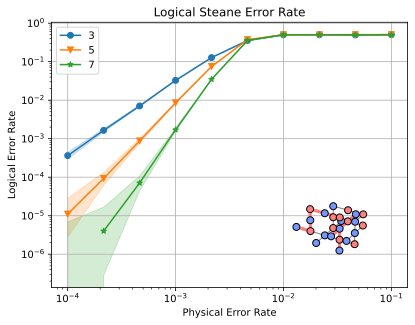

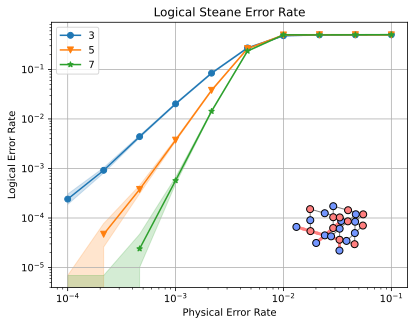

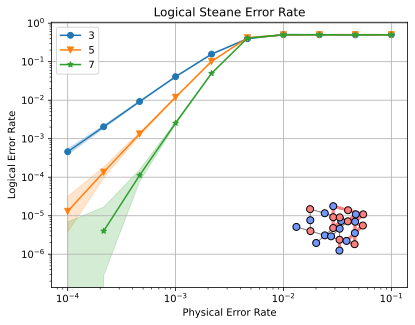

In [14]:
if block_graph and filled_block_graphs:

    import sinter
    from tqec.simulation.plotting.inset import plot_observable_as_inset
    from tqec.simulation.simulation import start_simulation_using_sinter

    # Function to generate simulation graphs
    def generate_graphs(pre_filled_block_graphs, support_observable_basis: Basis, SAVE_DIR) -> None:

        # Get block_graph from set of pre_filled block_graphs
        block_graph_for_simulation = graphs_for_given_basis(pre_filled_block_graphs, support_observable_basis)

        # Start sinter
        if block_graph_for_simulation:

            # ZX-graph to overlay over output
            zx_graph_for_simulation = block_graph_for_simulation.to_zx_graph()

            # Correlation surfaces for simulation
            correlation_surfaces_for_simulation = block_graph_for_simulation.find_correlation_surfaces()

            # Call Sinter
            stats = start_simulation_using_sinter(
                block_graph_for_simulation,
                range(1, 4),
                list(np.logspace(-4, -1, 10)),
                NoiseModel.uniform_depolarizing,
                manhattan_radius=2,
                observables=correlation_surfaces_for_simulation,
                max_shots=1_000_000,
                max_errors=5_000,
                decoders=["pymatching"],
                print_progress=False,
                save_resume_filepath=Path(
                    f"../_examples_database/{full_circuit_name}_{support_observable_basis.value}.csv"
                ),
                database_path=Path("../_examples_database/database.pkl"),
            )

            # Visualise output
            for i, stat in enumerate(stats):

                html = block_graph_for_simulation.view_as_html(
                    pop_faces_at_directions=("-Y", "+X"),
                    show_correlation_surface=correlation_surfaces_for_simulation[i],
                )
                print(f"Correlation surface for {full_circuit_name}_{support_observable_basis}_{i}")
                display(html)

                fig, ax = plt.subplots()
                sinter.plot_error_rate(
                    ax=ax,
                    stats=stat,
                    x_func=lambda stat: stat.json_metadata["p"],
                    group_func=lambda stat: stat.json_metadata["d"],
                )
                plot_observable_as_inset(ax, zx_graph_for_simulation, correlation_surfaces_for_simulation[i])
                ax.grid(axis="both")
                ax.legend()
                ax.loglog()
                ax.set_title(f"Logical {circuit_name.capitalize()} Error Rate")
                ax.set_xlabel("Physical Error Rate")
                ax.set_ylabel("Logical Error Rate")
                fig.savefig(
                    SAVE_DIR /
                    f"{full_circuit_name}_{support_observable_basis}_{i}.png"
                )

    # Function to call the simulation cycle for all relevant bases
    def run_simulation(pre_filled_block_graphs, SAVE_DIR):
        SAVE_DIR.mkdir(exist_ok=True)
        generate_graphs(pre_filled_block_graphs, Basis.Z, SAVE_DIR)
        generate_graphs(pre_filled_block_graphs, Basis.X, SAVE_DIR)

    # Call simulation cycle
    if filled_block_graphs:
        SAVE_DIR = Path("results")
        run_simulation(filled_block_graphs, SAVE_DIR)